In [48]:
##Importar Matrices
### Ejemplo con datos codo derecho
### SVM por coordenada

In [2]:
##https://drive.google.com/file/d/1puu8E6V_dA68ogtfbl1nD1ZDNIP81lnp/view?usp=sharing
##https://drive.google.com/file/d/1puu8E6V_dA68ogtfbl1nD1ZDNIP81lnp/view
## ID archivo: 1puu8E6V_dA68ogtfbl1nD1ZDNIP81lnp
FILEID = "1puu8E6V_dA68ogtfbl1nD1ZDNIP81lnp"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MocapDatabase.zip && rm -rf /tmp/cookies.txt
!unzip MocapDatabase.zip
!dir

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


 El volumen de la unidad C es Windows
 El número de serie del volumen es: E854-2EA9

 Directorio de C:\Users\mafem

05/08/2020  04:16 p.m.    <DIR>          .
05/08/2020  04:16 p.m.    <DIR>          ..
13/04/2019  10:00 a.m.    <DIR>          .anaconda
01/12/2017  11:26 a.m.    <DIR>          .android
05/08/2020  04:16 p.m.    <DIR>          .conda
05/08/2020  04:07 p.m.                43 .condarc
23/06/2020  03:43 p.m.    <DIR>          .config
11/05/2020  09:50 a.m.    <DIR>          .eclipse
12/10/2017  06:08 a.m.                88 .gitconfig
08/08/2018  05:37 p.m.    <DIR>          .idlerc
27/07/2020  03:40 p.m.    <DIR>          .ipynb_checkpoints
23/04/2019  11:17 a.m.    <DIR>          .ipython
23/04/2019  02:56 p.m.    <DIR>          .jupyter
02/05/2019  11:37 a.m.    <DIR>          .matplotlib
08/04/2017  09:30 p.m.    <DIR>          .oracle_jre_usage
03/06/2020  12:04 p.m.    <DIR>          .p2
15/08/2018  06:14 p.m.    <DIR>          .PyCharmCE2018.2
30/04/2018  10:40 a.m. 

Text(0.5, 1.0, 'mean Z Kinect')

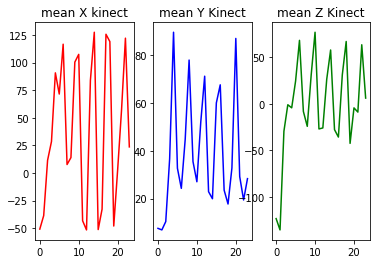

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

csv_path = os.path.join("Documents\Maestria\JF\Regresion", "CodoDerechoDataVRvsKin.xls")
DATA=pd.read_excel(csv_path) #matriz de datos vr organizada (n,90), 30 datos de cada coordenada ,de datos kinect promedio x,y,z
XVR=DATA.iloc[:,0:29]
YVR=DATA.iloc[:,30:59]
ZVR=DATA.iloc[:,60:89]
XKIN=DATA.iloc[:,90]
YKIN=DATA.iloc[:,91]
ZKIN=DATA.iloc[:,92]


plt.subplot(131)
plt.plot(XKIN,'r-')
plt.title('mean X kinect')

plt.subplot(132)
plt.plot(YKIN,'b-')
plt.title('mean Y Kinect')

plt.subplot(133)
plt.plot(ZKIN,'g-')
plt.title('mean Z Kinect')




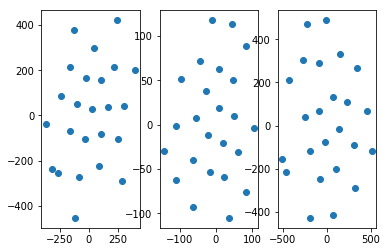

In [15]:
from sklearn import manifold

n_components = 2
tsne_20 = manifold.TSNE(n_components=n_components, perplexity=20)

Xtsne_20=tsne_20.fit_transform(XVR)
Ytsne_20=tsne_20.fit_transform(YVR)
Ztsne_20=tsne_20.fit_transform(ZVR)

plt.subplot(131)
plt.scatter(Xtsne_20[:, 0],Xtsne_20[:, 1])
plt.subplot(132)
plt.scatter(Ytsne_20[:, 0],Ytsne_20[:, 1])
plt.subplot(133)
plt.scatter(Ztsne_20[:, 0],Ztsne_20[:, 1])



#tsne_50 = manifold.TSNE(n_components=n_components, perplexity=50)




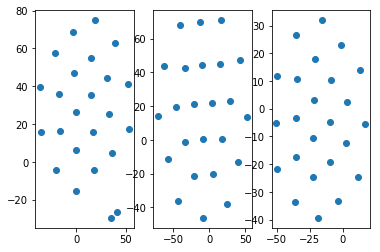

In [16]:
n_components = 2
tsne_20 = manifold.TSNE(n_components=n_components, perplexity=50)

Xtsne_20=tsne_20.fit_transform(XVR)
Ytsne_20=tsne_20.fit_transform(YVR)
Ztsne_20=tsne_20.fit_transform(ZVR)

plt.subplot(131)
plt.scatter(Xtsne_20[:, 0],Xtsne_20[:, 1])
plt.subplot(132)
plt.scatter(Ytsne_20[:, 0],Ytsne_20[:, 1])
plt.subplot(133)
plt.scatter(Ztsne_20[:, 0],Ztsne_20[:, 1])

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

XX_train, XX_test, yX_train, yX_test = train_test_split(Xtsne_20, XKIN,
                                                    test_size=0.3)

pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
pipeline=pipe.fit(XX_train,yX_train)
parameters =  {'C' : [0, 0.001, 0.01, 0.1,1,10,100,1000],"gamma":[0, 0.001, 0.01, 0.1,1,10,100,1000]}
grid_search=GridSearchCV(pipeline, parameters)
grid_search.fit(XX_train, yX_train)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

C:\Users\mafem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter C for estimator Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]). Check the list of available parameters with `estimator.get_params().keys()`.